## Algorytm k-średnich i jego wykorzystanie do kompresji obrazu

### Podstawowe kroki algorytmu:

* W sposób losowy wybierz $k$ punktów w rozważanej przestrzeni. Wylosowane punkty będą stanowić początkowe położenie centroidów.
* Przyporządkuj każdy punkt do najbliższego centroidu.
* Oblicz nowe współrzędne centroidów i powtórz kroki 2 oraz 3 określoną liczbę razy.
* Wykonaj algorytm kilka razy w razie, gdyby początkowe losowanie centroidów było pechowe i zostało znalezione nieoptymalne rozwiązanie. Odpowiedzią końcową będzie najlepszy uzyskany wynik, tzn. taki, dla którego występuje najmniejsza odległość między punktami a odpowiadającymi im centroidami.

#### Więcej na temat algorytmu można przeczytać na http://itcraftsman.pl/algorytm-k-srednich-uczenie-nienadzorowane/

In [1]:
# Zaimportuj mnie
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#### Na początek, spróbujemy poklastrować następujący zbiór danych (dane skupione wokół **5 grup**)

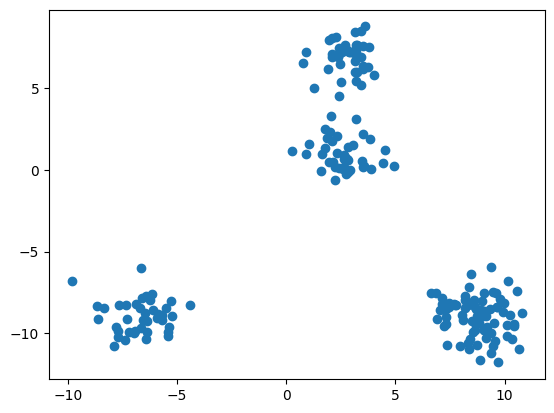

In [ ]:
# Odpal mnie
X, _ = make_blobs(n_samples = 200, n_features = 2, centers = 5)

plt.scatter(X[:,0], X[:,1])
plt.show()

**Zad. 1.** Przeanalizuj funkcję `znajdz_najblizszy_centroid`. Spróbuj zrozumieć jej działanie. W jaki sposób wyznaczany jest najbliższy centroid? W szczególności sprawdź (w Internetach) działanie funkcji `argmin`, `diagonal`, `dot`.

In [ ]:
def znajdz_najblizszy_centroid(X, centroids):
    """
    Dla każdego punktu pomiarowego wyznacza najbliższy mu centroid

    Args:
        X (ndarray): (m, n) Punkty pomiarowe, m wierszy, n kolumn
        centroids (ndarray): (K, n) współrzędne centroidów

    Returns:
        idx (array): (m,) tablica z najbliższymi centroidami

    """
    # Definiujemy tablicę, która będzie zawierać informację o tym , który centroid jest
    # najbliższy danemu punktowi ze zbioru X. Tablica ta ma m wierszy, bo tyle mamy punktów
    # pomiarowych
    idx = np.zeros(X.shape[0], dtype=int)

    # Dla każdego punktu pomiarowego sprawdzamy, która centroida jest mu najbliższa
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.diagonal(np.dot(centroids - X[i, :], (centroids - X[i, :]).T)))

    return idx

**Zad. 2.** Zaimplementuj funkcję `wyznacz_centroidy`. Funkcja ta pobiera jako argument zbiór punktów `X` oraz etykiety `idx`, tzn. listę z informacją, do jakiej centroidy należy dany punkt. Dodatkowo, pobierany jest argument `K` oznaczający liczbę centroid. Funkcja zwraca współrzędne nowych centroid.

In [ ]:
def wyznacz_centroidy(X, idx, K):
    """
    Oblicza nowe współrzędne centroidów, tzn. dla każdej etykiety
    oblicza średnie wartości współrzędnych.

    Args:
        X (ndarray):   (m, n) Zbiór danych, m wierszy, n kolumn
        idx (ndarray): (m,) Lista z etykietami centroid, tzn. dla każdego wiersza z X
                            zawiera indeks centroidy, która jest mu najbliższa.
        K (int):       Liczba centroid

    Returns:
        centroids (ndarray): (K, n) Nowe współrzędne centroid. K wierszy, bo K centroid
                              oraz n kolumn, bo przestrzeń jest n-wymiarowa
    """
    # Oblicz liczbę wierszy i kolumn z zbiorze danych X. Wskazówka: artybut shape
    m, n = ### TWÓJ KOD TUTAJ ###

    # Zainicjalizuj tablicę wymiaru K x n wypełnioną zerami. Tablica ta
    # będzie przechowywać nowe współrzędne centroid
    centroids = ### TWÓJ KOD TUTAJ ###

    # Dla każdej z K centroid
    for i in range(K):
        # Oblicz nowe współrzędne centroid. Wskazówka: najpierw trzeba ze zbioru X
        # wybrać tylko te wiersze, które odpowiadają centroidzie i, a potem obliczyć z nich
        # średnią
        centroids[i] = ### TWÓJ KOD TUTAJ ###

    return centroids

**Zad.3.** Zaimplementuj funkcję `zainicjalizuj_losowe_centroidy`. Działanie funkcji jest bardzo proste: ze zbioru punktów `X` wylosuj `K` z nich i te wylosowane punkty będą początkowymi centroidami.




In [ ]:
def zainicjalizuj_losowe_centroidy(X, K):
    """
    Inicjalizuje początkowe położenie centroidów.

    Args:
        X (ndarray): Punkty pomiarowe
        K (int):     Liczba centroid

    Returns:
        centroids (ndarray): Współrzędne początkowych centroid
    """
    # Najprościej można to zrobić permutując zbiór pomiarowy X
    # i wybierając z niego pierwszych K elementów
    # Przepermutuj (jest takie słowo?) zbiór X. Wskazówka: użyj funkcji
    # np.random.permutation
    randidx = ### TWÓJ KOD TUTAJ ###

    # Z przepermutowanego zbioru, wybierz K pierwszych wierszy
    centroids = X[### TWÓJ KOD TUTAJ ###]

    return centroids

**Zad.4.** Zaimplementuj funkcję `odleglosc_punktow_od_centroid` obliczającą dystans między punktami a odpowiadającymi im centroidami.  Funkcja pobiera jako argument zbiór punktów `X`, etykiety `idx`, tzn. listę z informacją, do jakiej centroidy należy dany punkt oraz współrzędne centrodi `centroids`.

In [ ]:
def odleglosc_punktow_od_centroid(X, idx, centroids):
  """
  Args:
    X (ndarray):  (m, n) Dane pomiarowe
    idx (ndarray): (m,) Tablica z etykietami punktów
    centroids (ndarray): (K, n) Tablica ze współrzędnymi K centroid
  """
  # Obliczamy ile jest centroid
  K = centroids.shape[0]

  # Zdefiniuj zmienną distance i przypisz jej początkową wartość 0
  distance = 0
  # Dla każdej z K centroid, obicz odległość punktu od tej centroidy i
  # dodaj do zmiennej distance. Wskazówka: najpierw ze zbioru X wybierz
  # wszystkie wiersze odpowiadające centroidzie i, następnie odejmij
  # współrzędne centroidy i, podnieś wynik do kwadratu, wysumuj po wszystkich
  # wierszach, a potem po wszystkich kolumnach. Na kańcu weź pierwiastek, żeby
  # Pitagoras się w grobie nie przewracał
  for i in range(K):
    distance += ### TWÓJ KOD TUTAJ ###

  return distance


**Zad. 5.** Złóż wszystkie składniki do kupy i zaimplementuj algorytm `k-średnich`. Zadanie polega głównie na umiejętnym wykorzystaniu funkcji zdefiniowanych w poprzednich zadaniach.

In [ ]:
def KMeans(X, K, num_trials = 10, num_iter = 20):
  """
  Wywołuje algorytm k-średnich num_trials razy i wybiera najlepszy rezultat, tzn.
  taki, dla którego mamy najmniejszą odległość między punktami a odpowiadającymi
  im centroidami.

  Args:
    X (ndarray):  (m, n) Zbiór pomiarowy
    K (int):     Liczba centroid

  Returns:
    best_idx (ndarray): (m,) Etykiety najlepszego klastrowania
    best_centroids (ndarray): (K,n) Współrzędne najlepszych centroidów
    best_distance (float): najmniejszy dystans między punktami a ich centroidami
  """

  # Zainicjalizuj losowe centroidy
  centroids = ### TWÓJ KOD TUTAJ ###

  for i in range(num_iter):
    # Dla każdego punktu znajdź najbliższe centroidy
    # oraz oblicz nowe wartości centroid
    idx = ### TWÓJ KOD TUTAJ ###
    centroids = ### TWÓJ KOD TUTAJ ###

  # Póki co najlepszym wynikiem jest ten uzyskany z
  # pierwszej iteracji algorytmu
  best_idx = idx
  best_centroids = centroids

  # Oblicz dystans między punktami a centroidami
  best_distance = ### TWÓJ KOD TUTAJ ###

  # Wykonujemy jeszcze num_trials - 1 prób i wybieramy najlepsze wyniki:
  for i in range(2, num_trials):
    # Zainicjalizuj centroidy
    centroids = ### TWÓJ KOD TUTAJ ###
    for i in range(num_iter):
      # Dla każdego punktu znajdź najbliższe centroidy
      # oblicz nowe wartości centroid oraz oblicz dystans między punktami a centroidami
      idx = ### TWÓJ KOD TUTAJ ###
      centroids = ### TWÓJ KOD TUTAJ ###
      distance = ### TWÓJ KOD TUTAJ ###

      # Jeśli obliczony dystans jest mniejszy od obecnie najlepszego, to
      # to najlepsze wyniki dostaliśmy w tej iteracji
      if ### TWÓJ KOD TUTAJ ###:
        best_distance = ### TWÓJ KOD TUTAJ ###
        best_idx = ### TWÓJ KOD TUTAJ ###
        best_centroids = ### TWÓJ KOD TUTAJ ###

  return best_idx, best_centroids, best_distance

**Zad.6** Puść algorytm dla naszego zbioru `X`, zdefiniowanego na górze tego notatnika. Pamiętaj, żeby ustawić liczbę centroidów na `5`.

In [ ]:
idx, centroids, distance = ### TWÓJ KOD TUTAJ ###

### Przedstawienie wyników

In [ ]:
plt.scatter(X[:,0], X[:,1], c = idx)
plt.plot(centroids[:,0], centroids[:,1], 'or', marker = 'X', markersize = 10)
plt.show()

### Kompresja obrazu z wykorzystaniem algorytmu `k-średnich`

##### Spróbuj skompresować poniższe zdjęcie z wykorzystaniem 16 kolorów

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w&usqp=CAU">

In [ ]:
# Ściągamy zdjęcie z Internetów
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w&usqp=CAU

--2024-05-19 17:00:52--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.20.139, 74.125.20.101, 74.125.20.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13461 (13K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w’

images?q=tbn:ANd9Gc 100%[===================>]  13.15K  --.-KB/s    in 0s      

2024-05-19 17:00:52 (53.7 MB/s) - ‘images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w’ saved [13461/13461]



In [ ]:
# Wczytujemy zdjęcie od pamięci komputera
photo = plt.imread("images?q=tbn:ANd9GcRDSK4hk5d987Y4Aop4VHPZkLM2KjjsCaoh7w")

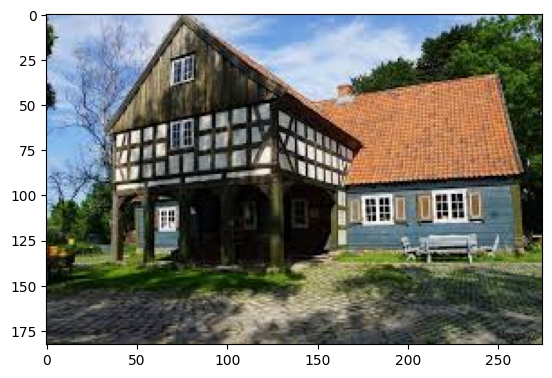

In [ ]:
# Wyświetlamy, żeby się przekonać, czy się dobrze ściągnęło
plt.imshow(photo)
plt.show()

**Zad.7.** Sprawdź wymiary zdjęcia (atrybut shape)


In [ ]:
### TWÓJ KOD TUTAJ ###

**Zad.8** Zmień rozmiary zdjęcia tak, żeby każdy wiersz odpowiadał jednemu pikselowi, a każda kolumna wartościom `RGB` kolorów przypisanych do danego piksela. Wskazówka: funkcja `np.reshape`

In [ ]:
# Zmień wymiary zdjęcia tak, żeby liczba wierszy była równa liczbie pikseli,
# a liczba kolumn wynosiła 3 (bo każdy piksel ma 3 kolory RGB)

X_img = ### TWÓJ KOD TUTAJ ###

# Dodatkowo przeskalujmy zdjęcie, żeby obliczenia wykonały się sprawniej
X_img = X_img/255.

**Zad.9.** Odpal algorytm `k-średnich` dla zdjęcia, gdzie liczba centroid jest równa 16

In [ ]:
# Odpal k-średnich
idx, centroids, distance = ### TWÓJ KOD TUTAJ ###

In [ ]:
# Dla każdego wiersza X_img (czyli dla każdego piksela), przypisz
# mu współrzędne najbliższmu mu centroidowi.

for i in range(16):
  X_img[### TWÓJ KOD TUTAJ ###] = ### TWÓJ KOD TUTAJ ###

# Użyj ponownie funkcji np.reshape tak, żeby zdjęcie odzyskało
# swoje pierwotne rozmiary.
photo_compressed = np.reshape(### TWÓJ KOD TUTAJ ###)

#### Wyświetlanie oryginalnego i skompresowanego zdjęcia

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(10, 6)

ax[0].imshow(photo)
ax[0].set(title = 'Zdjęcie oryginalne')

ax[1].imshow(photo_compressed)
ax[1].set(title = 'Zdjęcie skompresowane z wykorzystaniem 16 kolorów')

plt.show()